In [106]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [107]:
data=pd.read_csv("emp_promotion.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [108]:
data.shape

(54808, 14)

# 1.Univariate

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

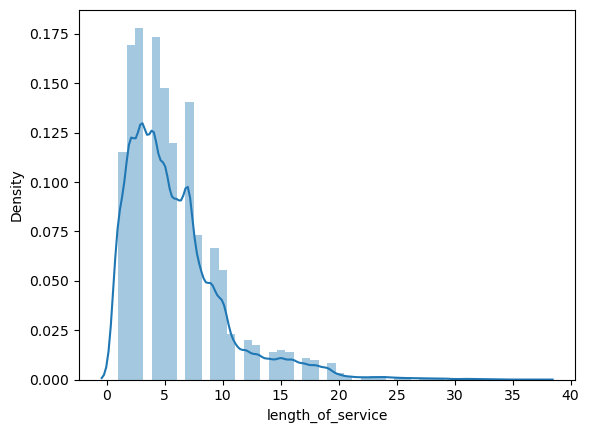

In [45]:
sns.distplot(data["length_of_service"])

# Multivariate

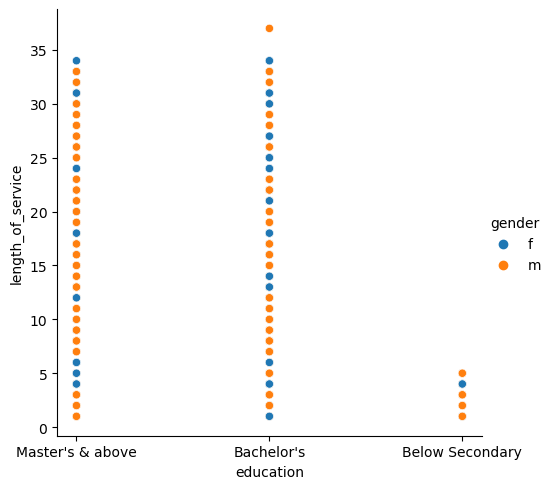

In [109]:
sns.relplot(x="education",y="length_of_service",data=data, hue="gender")

# Descriptive analysis

In [110]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# 2. Data preprocessing

Removing unwanted columns

In [111]:
data=data.drop(columns=["employee_id","region","recruitment_channel","gender","age","education"])

In [112]:
data.head()

,department,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,1,5.0,8,1,0,49,0
1,Operations,1,5.0,4,0,0,60,0
2,Sales & Marketing,1,3.0,7,0,0,50,0
3,Sales & Marketing,2,1.0,10,0,0,50,0
4,Technology,1,3.0,2,0,0,73,0


# Checking and handling NULL values in the data

In [113]:
data.isnull().sum()    #checking NULL values

department                 0
no_of_trainings            0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [114]:
#data["education"].unique()

In [115]:
data["previous_year_rating"].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [116]:
data["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [117]:
data["previous_year_rating"].fillna(data["previous_year_rating"].mean(),inplace=True) 

#replacing missing value in numerical values

In [118]:
data["previous_year_rating"].head(10)

0    5.0
1    5.0
2    3.0
3    1.0
4    3.0
5    3.0
6    3.0
7    3.0
8    4.0
9    5.0
Name: previous_year_rating, dtype: float64

In [119]:
data.isnull().sum()

department              0
no_of_trainings         0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Finding and removing negative data

In [120]:
n=data[(data["KPIs_met >80%"]==0) & (data["awards_won?"]==0) & (data["previous_year_rating"]==1.0) & (data["is_promoted"]==1) & 
      (data["avg_training_score"]<60)]

n

,department,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,1,1.0,2,0,0,58,1
51374,Sales & Marketing,1,1.0,5,0,0,58,1


In [121]:
data.drop(index=[31860,51374],inplace=True)

# Handling outliers

In [122]:
q1=np.quantile(data["length_of_service"],0.25)
q3=np.quantile(data["length_of_service"],0.75)

In [123]:
result=q3-q1

upperBound=(1.5*result)+q3
lowerBound=(1.5*result)-q1

In [124]:
print("q1:",q1)
print("q3:",q3)
print("result:",result)

print("UpperBound:",upperBound)
print("LowerBound:",lowerBound)
print("Skewed data:",len(data[data['length_of_service']>upperBound]))

q1: 3.0
q3: 7.0
result: 4.0
UpperBound: 13.0
LowerBound: 3.0
Skewed data: 3489


In [125]:
pd.crosstab([data['length_of_service']>upperBound],data['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [101]:
data["length_of_service"]=[upperBound if x>upperBound else x for x in data['length_of_service']]
data["length_of_service"]

0         8.0
1         4.0
2         7.0
3        10.0
4         2.0
         ... 
54803    13.0
54804     6.0
54805     3.0
54806     2.0
54807     5.0
Name: length_of_service, Length: 54806, dtype: float64

# Handling Categorical values

In [126]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data["department"]=le.fit_transform(data["department"])

In [127]:
data["department"].unique()

array([7, 4, 8, 0, 6, 5, 1, 2, 3])

# Handling Imbalanced data

In [128]:
x=data.drop('is_promoted',axis=1)
y=data['is_promoted']

print(x.shape)
print(y.shape)

(54806, 7)
(54806,)


In [129]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

x_update,y_update=sm.fit_resample(x,y)

print(x_update.shape)
print(y_update.shape)

(100280, 7)
(100280,)


# Splitting data into train and test

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_update,y_update,test_size=0.2,random_state=0)

# Model building

Using Logistic regression

In [131]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [132]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion="entropy",random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [133]:
dtpred=dt.predict(x_test)

In [134]:
dtpred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [135]:
y_test

92988    1
77138    1
65836    1
88329    1
85776    1
        ..
91647    1
27994    0
58334    1
23270    0
20055    0
Name: is_promoted, Length: 20056, dtype: int64

In [136]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(dtpred,y_test)

accuracy

0.8915037893897089

In [137]:
new=dt.predict([[0,1,2.0,1,10,1,10]])
new

array([1], dtype=int64)

# Saving the model for Application development

In [138]:
import pickle
pickle.dump(dt,open('promotion.pkl','wb'))